In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('../data/interim/train.csv')
df_test = pd.read_csv('../data/interim/test.csv')

In [ ]:
texts = df['text'].values
lengths = sorted([len(x.split()) for x in texts])

In [ ]:
print(f'Min #words in tweet: {lengths[0]}\nMax #words in tweet: {lengths[-1]}')

Min #words in tweet: 1
Max #words in tweet: 31


As noticed by competition participants, some of the tweets appear twice and have distinct target values, so they are mislabeled for sure.

Before training we should remove them, so that it would not affect our model

In [ ]:
df_mislabeled = df.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]
mislabeled = df_mislabeled.iloc[:, 0].index.tolist()
mislabeled

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'To fight bioterrorism sir.',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'He came to a land which was engulfed in tribal war and turned it into a land 

Printing word length distributions

[]

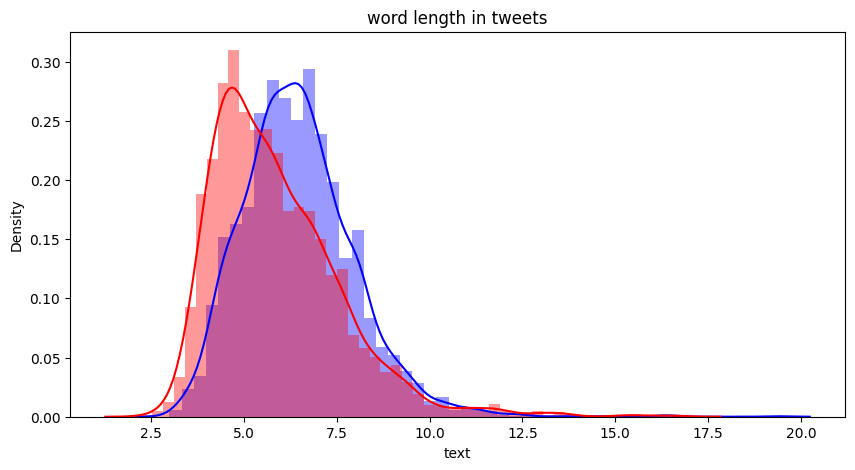

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

word = df[df['target'] == 1]['text'].str.split().apply(lambda x : [len(i) for i in x])

sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
ax1.set_title('word length in tweets')

word = df[df['target'] == 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')

plt.plot()

Plotting the discribution of word count in disaster and non-disaster tweets

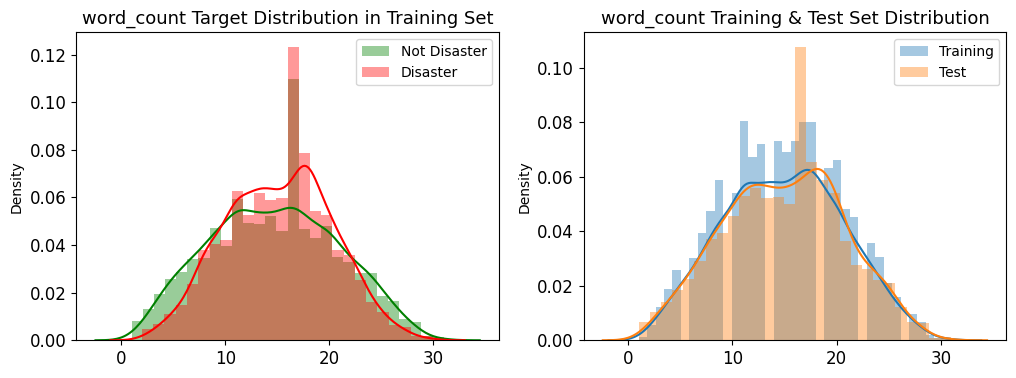

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

DISASTER_TWEETS = df['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=100)

sns.distplot(df.loc[~DISASTER_TWEETS]['word_count'], label='Not Disaster', ax=axes[0], color='green')
sns.distplot(df.loc[DISASTER_TWEETS]['word_count'], label='Disaster', ax=axes[0], color='red')

sns.distplot(df['word_count'], label='Training', ax=axes[1])
sns.distplot(df_test['word_count'], label='Test', ax=axes[1])

for j in range(2):
    axes[j].set_xlabel('')
    axes[j].tick_params(axis='x', labelsize=12)
    axes[j].tick_params(axis='y', labelsize=12)
    axes[j].legend()

axes[0].set_title(f'word_count Target Distribution in Training Set', fontsize=13)
axes[1].set_title(f'word_count Training & Test Set Distribution', fontsize=13)

plt.show()